## Predicting Sales

### Importing Libraries

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading Dataset

In [120]:
df = pd.read_csv(r"C:\Users\tejas\Documents\OIBSIP\Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [121]:
df.shape

(200, 5)

In [122]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [123]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [124]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [125]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [127]:
df.isnull().values.any()

False

In [128]:
df = df.dropna()
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [129]:
df['Sales'].value_counts()

Sales
9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: count, Length: 121, dtype: int64

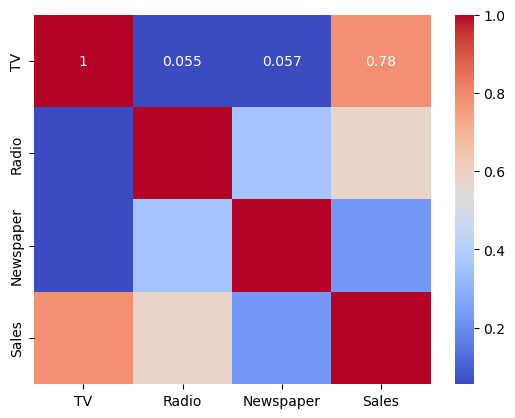

In [130]:
corr_mat = df.corr()
sns.heatmap(corr_mat, annot=True, cmap = 'coolwarm')
plt.show()

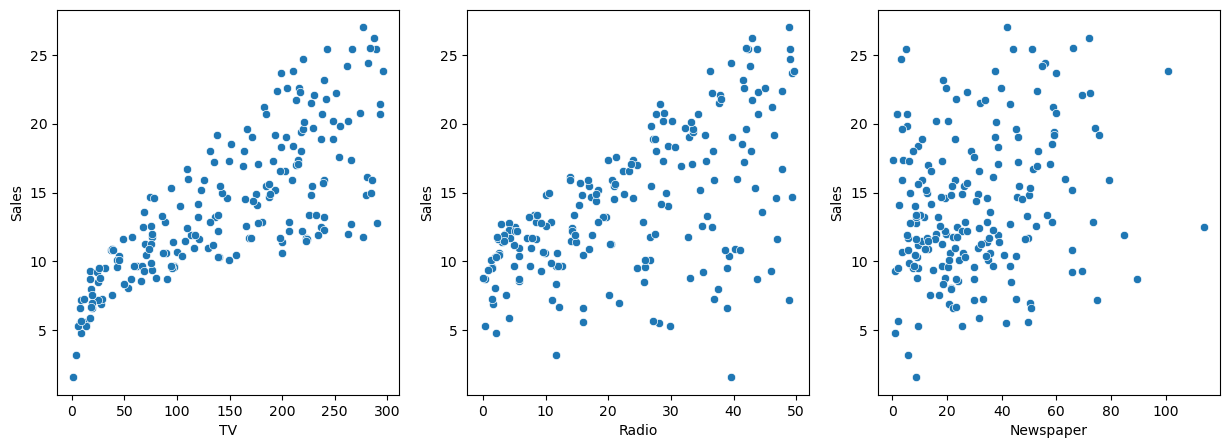

In [131]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.scatterplot(data=df, x='TV', y='Sales', ax=axs[0])
sns.scatterplot(data=df, x='Radio', y='Sales', ax=axs[1])
sns.scatterplot(data=df, x='Newspaper', y='Sales', ax=axs[2])
plt.show()

### Training the model

In [132]:
X = df.drop("Sales", axis=1)
y = df["Sales"]

In [133]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [134]:
X_train.shape

(160, 3)

In [135]:
X_test.shape

(40, 3)

In [136]:
y_train.shape

(160,)

In [137]:
y_test.shape

(40,)

### Model Fitting

### Linear Regression

In [138]:
lr =LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [139]:
mse_lr = mean_squared_error(y_test,y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [140]:
print(f'Mean Squared Error using Linear Regression is: {mse_lr:.2f}')
print(f'R2 Score using Linear Regression is:',round(r2_lr*100,2),'%')

Mean Squared Error using Linear Regression is: 3.17
R2 Score using Linear Regression is: 89.94 %


In [141]:
print(f'R2 Score using Linear Regression is:',round(r2_lr*100,2),'%')

R2 Score using Linear Regression is: 89.94 %


### Random Forest

In [142]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [143]:
mse_rf = mean_squared_error(y_test,y_pred_rf)
r2_rf = r2_score(y_test,y_pred_rf)

In [144]:
print(f"Mean Squared Error using Random Forest is: {mse_rf:.2f}")
print(f"R2 Score using Random Forest is:",round(r2_rf*100,2),"%")

Mean Squared Error using Random Forest is: 0.56
R2 Score using Random Forest is: 98.22 %


#### The Random Forest Model performed the best with lower MSE of 0.59 and higher R2 Score of 98.14%.

In [145]:
#In case of Sales Prediction, the predictive performnace is important soRandom Forest is best suitable,when it comes to interpretability(understanding the effect of each feature on sales) Linear Regression is best suitable.

### Predicting the Sales

In [153]:
input_data = pd.DataFrame({'TV': [170], 'Radio': [35], 'Newspaper': [12]})
predicted_sales = rf.predict(input_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: [17.904]
